<a href="https://colab.research.google.com/github/jswap21/API-code-repository/blob/main/AT_Lesson_49_Reference_v0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 49: Central Limit Theorem I

**WARNING:** The reference notebook is meant **ONLY** for a teacher. Please **DO NOT** share it with any student. The contents of the reference notebook are meant only to prepare a teacher for a class. To conduct the class, use the class copy of the reference notebook. 

|Particulars|Description|
|-|-|
|**Topic**|Central Limit Theorem I|
|||
|**Class Description**|In this class, a student will learn the concept of Central Limit Theorem (CLT) using Heart Disease UCI dataset|
|||
|**Class**|C49|
|||
|**Class Time**|45 minutes|
|||
|**Goals**|Plot distribution of the mean of the samples of `chol` (cholesterol) column|
|||
|**Teacher Resources**|Google Account|
||Laptop with internet connectivity|
||Earphones with mic|
|||
|**Student Resources**|Google Account|
||Laptop with internet connectivity|
||Earphones with mic|

---

### Warm-up Quiz

```
TEACHER
I have an exciting quiz question for you! Are you ready to answer this question?

EXPECTED STUDENT RESPONSE
Yes.
```

**Instructions for the Teacher:**
- Please click on the "Quiz Time" button on the bottom right corner of your screen to start the In-Class Quiz. <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/quiz-time.png' width = 150>

- A quiz will be visible to both you and the student. Encourage the student to answer the quiz question. 

- The student may choose the wrong option, help the student to think correctly about the question and then answer again. 

- After the student selects the correct option, the "End Quiz" button will start appearing on your screen. <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/end-quiz.png' width = 150>  

- Click the "End quiz" button to close the quiz pop-up and continue the class. 
  
- Do not spend more than 2 minutes on this quiz.




---

### Teacher-Student Activities

In this class, you will learn about sampling distribution and Central Limit Theorem which is one of the most important theorems used in statistical inference. We will implement the Central Limit Theorem on a **Heart Disease dataset**. For this, we need to learn a simple concept called sampling. Before we continue further, let's load the heart disease dataset.

**Data Description**

The heart Disease UCI dataset contains data collected on 14 different attributes by examining 303 patients. The dataset focuses only on differentiating patients having heart disease; labelled as value 1 and those not having heart disease; labelled as value 0. The 14 attributes (or columns) are as follows:

|Columns|Description|
|-|-|
|age|age in years|
|sex|sex (1 = male; 0 = female)|
|cp|chest pain type (4 values)|
|trestbps|resting blood pressure (in mm Hg on admission to the hospital)|
|chol|serum cholesterol in $\frac{mg}{dl}$|
|fbs|fasting blood sugar > 120 $\frac{mg}{dl}$|
|restecg|resting electrocardiographic results (values 0, 1, 2)|
|thalach|maximum heart rate achieved|
|exang|exercise induced angina (1 = yes; 0 = no)|
|oldpeak|ST depression induced by exercise relative to rest|
|slope|the slope of the peak exercise ST segment|
|ca|number of major vessels (0-3) colored by fluoroscopy|
|thal|A blood disorder called thalassemia|
|target|1 = presence of heart disease; 0 = absence of heart disease|

**Source:** https://archive.ics.uci.edu/ml/datasets/Heart+Disease




---

#### Activity 1: Loading Data

Load the heart disease dataset. Here's the dataset link:

https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/uci-heart-disease/heart.csv


In [ ]:
# S1.1: Import the required modules and load the heart disease dataset. Also, display the first five rows.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

csv_file = 'https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/uci-heart-disease/heart.csv'
df = pd.read_csv(csv_file)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Let's first look at the complete information on the `df` DataFrame.

In [ ]:
# S1.2: Apply the 'info()' function on the 'df' DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


As you can see there are 303 entries for each column and no missing values. For implementing the Central Limit theorem, we need to choose a column having continuous numeric values. So, let's consider `chol` (cholesterol) column and plot its distribution.

---

#### Activity 2: Sampling

**Q: What is sampling?**

Sampling is a process of taking a few data points (or observations) from an entire column. Let's draw a sample of 10 cholesterol values from the `chol` column. For this, you need to use the `sample()` function from the `pandas` module. The source of the sample itself becomes the population. It takes an integer value as input which denotes the number of samples to be drawn.

**Syntax: `sample(n = num_of_samples)`**



In [ ]:
# S2.1: Draw a sample of 10 cholesterol values from the 'chol' column.
chol_series = df['chol']
chol_sample = chol_series.sample(n = 10) # n = 10 denotes that we are drawing 10 samples from a population of 303.
print(chol_series.size)
chol_sample

303


144    197
268    286
74     213
9      168
69     209
98     315
189    172
250    298
15     219
61     309
Name: chol, dtype: int64

As you can see, we have taken a sample of 10 random cholesterol values from the `chol` column.

**Q: Why do we need to do sampling?**

Sometimes there is a need to draw some valid conclusions from a large group of individuals or the entire population. Suppose you need to find out the common symptoms found in the patient of heart disease. It may not be feasible or  impossible to examine the symptoms of the entire population. Instead we may examine only a small part or portion of the population known as **sample**. In this way, we can find out what are the common symptoms of heart disease found in patients for the entire population based on the results found in the sample. 


**Mean of Samples**

We will draw several random samples and find their means. Then we will plot the means on a histogram. You will see that means of all the samples follow normal distribution. You have seen that it is easy to make probabilistic predictions using the normal distribution. 

Let's plot the distribution of the `chol` column.

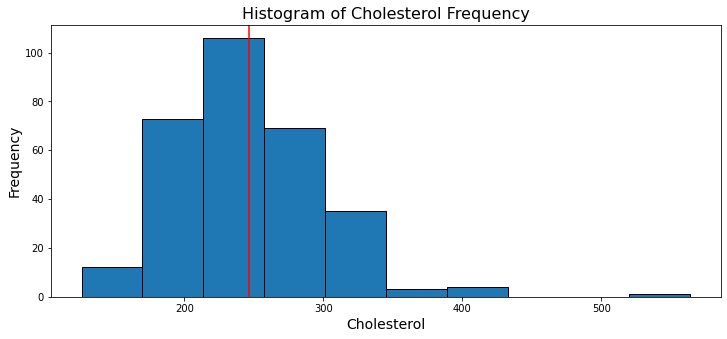

Mean cholesterol value is 246.264


In [ ]:
# S2.2: Create a histogram for all the observations in the 'chol' column. 
plt.figure(figsize = (12, 5))
plt.hist(chol_series, bins = 'sturges', edgecolor = 'black')
plt.xlabel('Cholesterol', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.title('Histogram of Cholesterol Frequency', fontsize = 16)
plt.axvline(x = chol_series.mean(), color = 'r')
plt.show()
print(f"Mean cholesterol value is {chol_series.mean():.3f}")

We can see that the vertical red line which indicates the mean of data is almost at the centre of  distribution. It is not exactly a normal distribution but close to it. The mean of population here is $246.264$ approx. The population mean is denoted as $\mu$. Thus, $\mu = 246.264$



---

#### Activity 3: Distribution of Means of Samples

Let's draw 300 samples from the `chol` column each having 30 observations from the `chol` column and compute their means. Then let's create a histogram for the means of 300 samples.

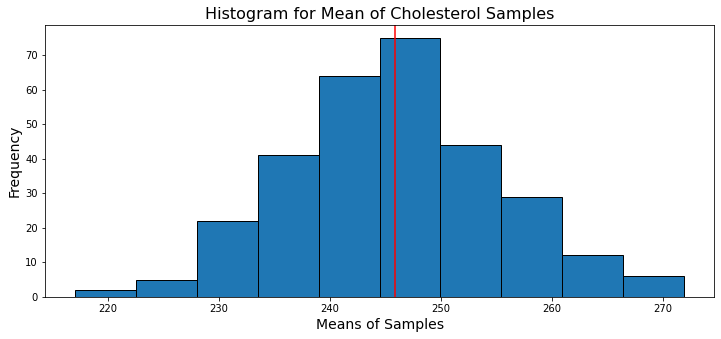

Mean of sample means = 245.847


In [ ]:
# T3.1: Draw 300 samples from the 'chol' column each having 30 observations, compute their means and create a histogram for the means of samples.
mean_list = []
no_of_samples = 300
for i in range(no_of_samples):
    mean_list.append(chol_series.sample(n = 30).mean())

plt.figure(figsize = (12, 5))
plt.hist(mean_list, bins = 'sturges', edgecolor = 'black')
plt.xlabel('Means of Samples', fontsize = 14) # 'fontsize' attribute sets the desired font size.
plt.ylabel('Frequency', fontsize = 14)
plt.title('Histogram for Mean of Cholesterol Samples', fontsize = 16)
plt.axvline(x = np.mean(mean_list), color = 'r')
plt.show()
print(f"Mean of sample means = {np.mean(mean_list):.3f}")

In the above code: 

1. We created an empty list to store the means of 300 samples.

2. Using the `sample()` function, we took 300 samples from the `chol` column each having 30 different cholesterol observations.

3. Using the `mean()` function, we calculated the mean for each sample containing 30 cholesterol values.

4. Using the `append()` function, we added each sample mean to the `mean_list`

5. We created a histogram for all the 300 means of 300 different samples.

6. The mean of all the sample means turn out to be approx 246 which is close to the mean of all the values in the `chol` column. This is very important observation

*If we take several samples of a dataset (or population) such that each sample contains sufficient number of observations, then the mean of all the sample means will be very close or nearly equal to the population mean*.

This is called **Central Limit Theorem (CLT)**. Also, the means of all the samples follow normal distribution (or bell curve). However, the following two factors must be satisfied:

*   For an accurate normal distribution, the sample sizes should be large.

*   The more closely the original population resembles a normal distribution, less sample size will be required. In our case the original shape of the distribution for the `chol` column was almost normal. Hence the sample size of 30 was good enough. However, if the original population is not normal (may be badly skewed, has multiple peaks, or has many outliers), sample size must be larger than 30.

Let's again take 300 samples and observe the distributions for the means of different samples each having sample sizes $n = 500, 1000, 10000$

**Note:** The `chol` column has exactly 303 values. So, to create a sample of 500 values, we have to provide another input `True` which is a value to the `replace` parameter inside the `sample()` function.

**Syntax:** `sample(n = num_of_samples, replace = True)`

`replace = True` denotes that repeat the values from the `chol` column (population in general).




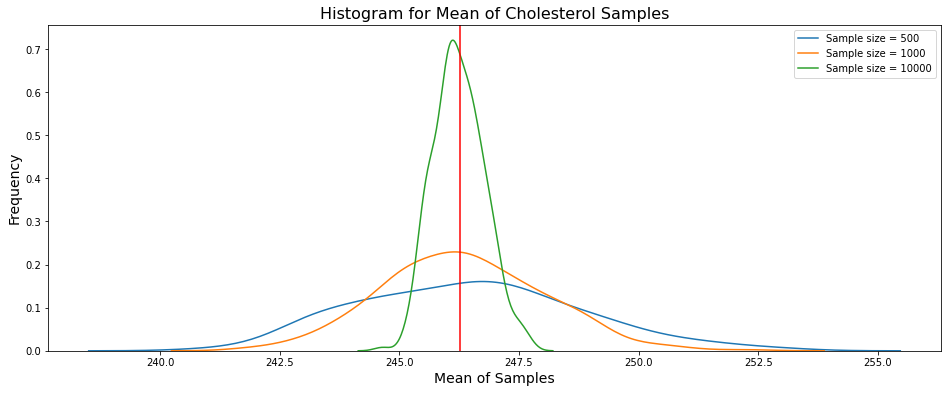

Mean of samples of size 500 = 246.455
Mean of samples of size 1000 = 246.331
Mean of samples of size 10000 = 246.244


In [ ]:
# S3.1: Create histogram for the means of the samples of the sizes 500, 1000, 10000.
means_list2 = []
means_list3 = []
means_list4 = []

no_of_samples = 300

for i in range(no_of_samples):
    means_list2.append(chol_series.sample(n = 500, replace = True).mean())
    means_list3.append(chol_series.sample(n = 1000, replace = True).mean())
    means_list4.append(chol_series.sample(n = 10000, replace = True).mean())

plt.figure(figsize = (16, 6))
sns.distplot(means_list2, hist = False, bins = 'sturges', label = 'Sample size = 500')
sns.distplot(means_list3, hist = False, bins = 'sturges', label = 'Sample size = 1000') 
sns.distplot(means_list4, hist = False, bins = 'sturges', label = 'Sample size = 10000') 

plt.axvline(x = chol_series.mean(), color = 'r') #for getting actual population mean

plt.xlabel('Mean of Samples', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.title('Histogram for Mean of Cholesterol Samples', fontsize = 16)
plt.legend()
plt.show()

print(f"Mean of samples of size 500 = {np.mean(means_list2):.3f}")
print(f"Mean of samples of size 1000 = {np.mean(means_list3):.3f}")
print(f"Mean of samples of size 10000 = {np.mean(means_list4):.3f}")

You may notice that as the sample size increases, the distribution of means of all the samples tends to look more and more like a normal distribution and groups more closely around the population mean (shown by the red vertical line).

Let's try to draw a sample having more than 303 values using the `sample()` with passing `replace = False` as an input.

**Note:** You should get `ValueError` with the following message:

```
ValueError: Cannot take a larger sample than population when 'replace=False'
```




In [ ]:
# S3.2: Draw a sample having more than 303 values using the sample() function with passing replace = False as an input.
chol_samp = chol_series.sample(n = 304, replace = False)
chol_samp

ValueError: ignored

Let's see what happens when the sample size of all the samples is very small.


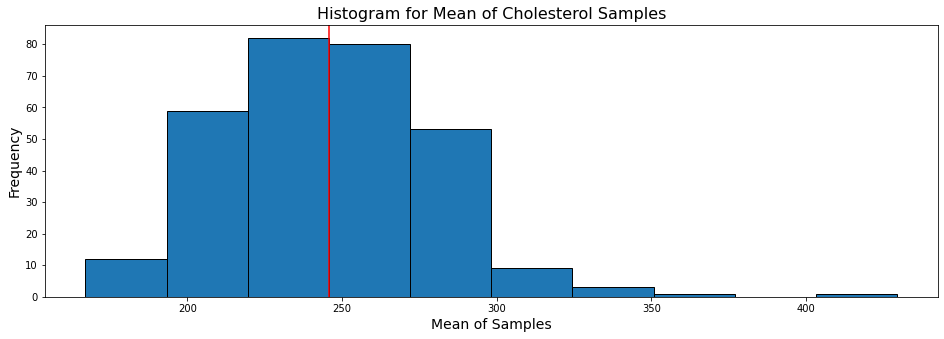

Mean of sample means: 245.622


In [ ]:
# S3.3: Take 300 samples each having 2 observations, calculate their means and create the histogram for means of all the samples. 
means_list5 = []
no_of_samples = 300
for i in range(no_of_samples):
    means_list5.append(chol_series.sample(n = 2).mean())

plt.figure(figsize = (16, 5))
plt.hist(means_list5, bins = 'sturges', edgecolor = "black")
plt.xlabel('Mean of Samples', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.title('Histogram for Mean of Cholesterol Samples', fontsize = 16)
plt.axvline(x = np.mean(means_list5), color = 'r') # for giving mean line
plt.show()
print(f"Mean of sample means: {np.mean(means_list5):.3f}")

Here you can notice that even when the sample size is very small, i.e., $n = 2$, the distribution of the mean of samples is normal. This is because the population (`chol` column ) follows normal distribution approximately.

---

## Additional Activities

The activities starting from this point are optional. Please do these activities ONLY if you have time to spare in the class. Otherwise, skip to the Wrap-Up section. The additional activities will not be available in the class copy of the notebook. You will have to manually add these activities in the class copy by adding new text and code cells.

Moreover, you don't have to do all the additional activities. Depending on the availability of time in a class, you can choose the number of additional activities to perform from this collection.

---

#### Activity 1: Distribution for `trestbps` & `thalach` Columns

Create a histogram for the `trestbps` & `thalach` columns and find out whether they follow normal distribution.

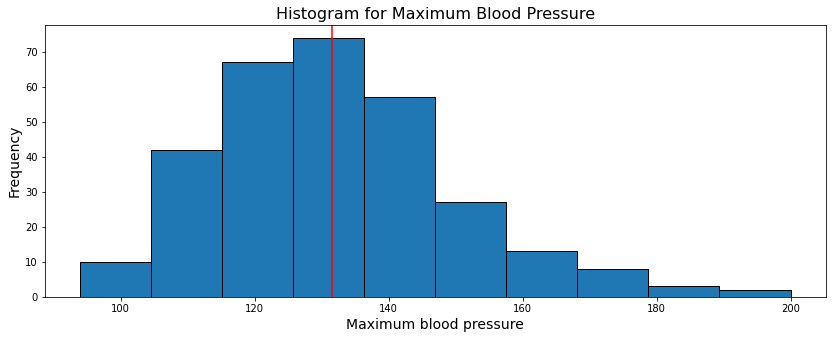

The mean maximum blood pressure = 131.624


In [ ]:
# S1.1: Create a histogram for 'trestbps' column.
plt.figure(figsize = (14, 5))
plt.hist(df['trestbps'], bins = 'sturges', edgecolor = 'black')
plt.xlabel('Maximum blood pressure', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.title('Histogram for Maximum Blood Pressure', fontsize = 16)
plt.axvline(x = df['trestbps'].mean(), color = 'r')
plt.show()
print(f"The mean maximum blood pressure = {df['trestbps'].mean():.3f}")

Now draw 500 samples from the `trestbps` column each of size 30 and create a histogram for the mean of the samples.

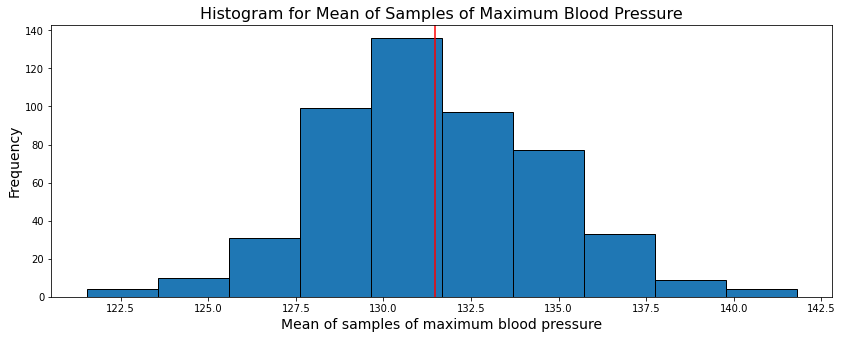

The mean of samples of maximum blood pressure = 131.484


In [ ]:
# AS1.2: Create a histogram for the mean of the samples taken from the 'trestbps' column.
trestbps_means_list = []
for i in range(500):
    trestbps_means_list.append(df['trestbps'].sample(n = 30, replace = True).mean())

plt.figure(figsize = (14, 5))
plt.hist(trestbps_means_list, bins = 'sturges', edgecolor = 'black')
plt.xlabel('Mean of samples of maximum blood pressure', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.title('Histogram for Mean of Samples of Maximum Blood Pressure', fontsize = 16)
plt.axvline(np.mean(trestbps_means_list), color = 'r')
plt.show()
print(f"The mean of samples of maximum blood pressure = {np.mean(trestbps_means_list):.3f}")

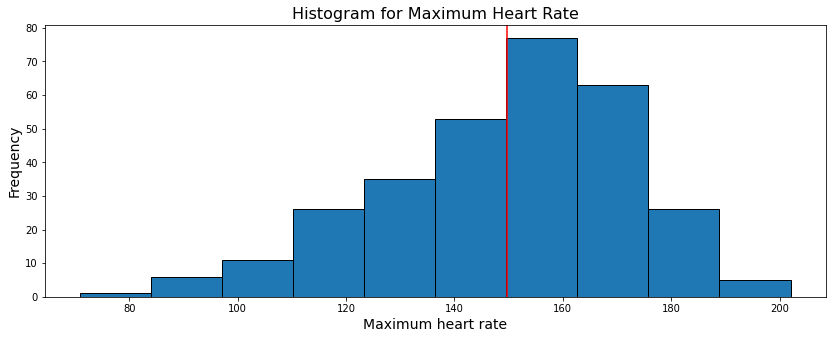

The mean maximum heart rate = 149.647


In [ ]:
# AS1.3: Create a histogram for 'thalach' column.
plt.figure(figsize = (14, 5))
plt.hist(df['thalach'], bins = 'sturges', edgecolor = 'black')
plt.xlabel('Maximum heart rate', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.title('Histogram for Maximum Heart Rate', fontsize = 16)
plt.axvline(x = df['thalach'].mean(), color = 'r')
plt.show()
print(f"The mean maximum heart rate = {df['thalach'].mean():.3f}")

Now draw 500 samples from the `thalach` column each of size 30 and create a histogram for the mean of the samples.

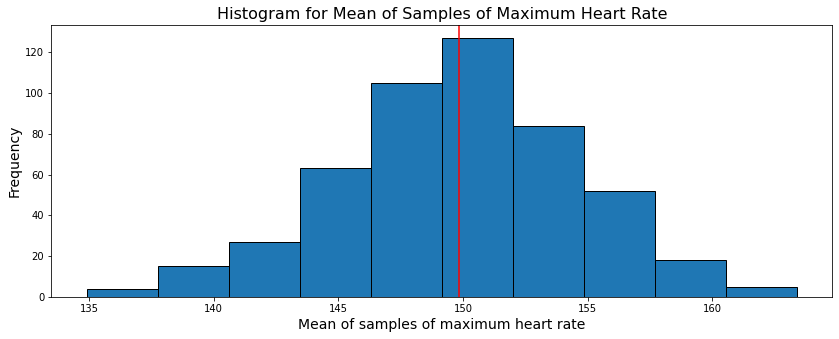

The mean of samples of maximum heart rate = 149.826


In [ ]:
# AS1.4: Create a histogram for the mean of the samples taken from the 'trestbps' column.
thalach_means_list = []
for i in range(500):
    thalach_means_list.append(df['thalach'].sample(n = 20, replace = True).mean())

plt.figure(figsize = (14, 5))
plt.hist(thalach_means_list, bins = 'sturges', edgecolor = 'black')
plt.xlabel('Mean of samples of maximum heart rate', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.title('Histogram for Mean of Samples of Maximum Heart Rate', fontsize = 16)
plt.axvline(np.mean(thalach_means_list), color = 'r')
plt.show()
print(f"The mean of samples of maximum heart rate = {np.mean(thalach_means_list):.3f}")

---

#### Activities

**Teacher Activities**

1. Central Limit Theorem I (Class Copy)

   https://colab.research.google.com/drive/1VNvJCnQhKg8XBnUWjPMuE-CRZrOV6BUD
     
2. Central Limit Theorem I (Reference Copy)

   https://colab.research.google.com/drive/1WG2PLnDa4BtNQZNSyYFdiyrNElm4Xjfg
   

---